# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Mulukutla Krishna Praneet<br>
Roll Number: 2020113010

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

Linear regression is implemented by finding a line equation which best fit for the training samples and could be generalized to any data. This is later used to make predicitons. Here, I have found the best fit line using Gradient descent, using the loss function as MSE(i.e, the mean square of the difference between the predicted and actual points). 
As we iteratively update the weights based on a learning rate that must be given, the algorithm eventually converges and the final weights and bias are used as the coefficients of the line equation, allowing us to plot decision boundary.<!-- your answer to 1.1.1 -->

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
# implement Linear Regression

# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# import mse function
from sklearn.metrics import mean_squared_error

# use the sigmoid function to calculate the probability of the logistic regression model
# def sigmoid(scores):
    # return 1 / (1 + np.exp(-scores))

# Logistic Regression

class LinearRegression():
    def __init__(self, X_train, y_train, learning_rate, iterations):
        # self.X = X_train
        self.X = np.c_[np.ones((X_train.shape[0],1)),X_train]
        self.y = y_train
        self.W = np.zeros((X_train.shape[1]+1,1))
        # self.learning_rate = 0.0001
        self.learning_rate = learning_rate
        # self.iterations = 10000
        self.iterations = iterations
        # print(self.X.shape)
        # print(self.y.shape)
        # print(self.W.shape)

# use the log loss function to calculate the loss in the logistic regression model
    # def log_loss(self, W):
    #     z = np.dot(self.X,W)
    #     cost0 = (self.y).T.dot(np.log(sigmoid(z)))
    #     cost1 = (1-(self.y)).T.dot(np.log(1-sigmoid(z)))
    #     cost = -((cost1 + cost0))/len(self.y) 
    #     return cost

    # dJ/dW = X.T.dot(sigmoid(z)-y)       

    def fit(self):
        # dJ_by_dW = 500
        counter = 0
        diff = 500
        prev_W = self.W
        # for i in range(self.iterations):        
        # stop when the gradient is small enough
        # while (np.sum(abs(dJ_by_dW)) > 0.0000000000001):
        while (diff > 1e-9 and counter < self.iterations):
        # while (diff > 1e-9):
            z = np.dot(self.X,self.W)
            # dJ_by_dW = np.dot(self.X.T,(sigmoid(z)-np.reshape(self.y,(len(self.y),1))))
            dJ_by_dW = np.dot(self.X.T,(z-np.reshape(self.y,(len(self.y),1))))        
            
            self.W = self.W - ((self.learning_rate) / (self.X.shape[0])) * dJ_by_dW

            diff = np.sum(abs(self.W - prev_W))
            prev_W = self.W
            counter += 1
            # print(self.W)
        return self.W, counter

    def predict(self, X_test):
        X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
        z = np.dot(X_test,self.W)   
        return z
        # return sigmoid(z)
    
    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        # y_pred = (y_pred > 0.5).astype(int)
        # print(y_pred)
        # print(y_test)
        # compare the predicted value with the actual value using MSE
        # count = 0
        MSE_pred = 0
        # for i in range(len(y_pred)):
        #     term = (y_pred[i] - y_test[i])**2
        #     MSE_pred += term

        MSE_pred = MSE_pred/len(y_pred)

        # MSE_pred = np.average((y_pred - y_test)**2)
        MSE_pred = mean_squared_error(y_test, y_pred)
        return MSE_pred, y_pred

        #     if y_pred[i] == y_test[i]:
        #         count += 1
        # return count/len(y_pred)
        # return np.mean(y_pred == y_test)
    
    def plot(self):
        plt.scatter(self.X[:,1], self.y, color = 'red')
        plt.plot(self.X[:,1], np.dot(self.X,self.W), color = 'blue')
        plt.title('Linear Regression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()

# learning_rates = [0.1]  
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
for i in range(len(learning_rates)):
    model = LinearRegression(np.array(x_train), np.array(y_train), learning_rates[i], 10000)
    m, num_iter =  model.fit()
    # print(m)
    MSE_pred, y_pred = model.accuracy(np.array(x_test), np.array(y_test))
    print("Learning rate: ", learning_rates[i])
    print("MSE: ", MSE_pred)
    print("Number of iterations: ", num_iter)
    print("\n")

# print("The best learning rate is 0.001")

    # model.plot()
# model = LinearRegression(np.array(x_train), np.array(y_train), 0.0001, 100000)
# model.fit()
# # model.plot()
# MSE_pred, y_pred = model.accuracy(np.array(x_test), np.array(y_test))
# print("MSE of Predictions = " , MSE_pred)


Learning rate:  0.0001
MSE:  0.2980447867761094
Number of iterations:  10000


Learning rate:  0.001
MSE:  0.024405447079961992
Number of iterations:  10000


Learning rate:  0.01
MSE:  0.013604297483637074
Number of iterations:  10000


Learning rate:  0.1
MSE:  0.013637994150961891
Number of iterations:  4336


Learning rate:  1
MSE:  0.013637994520280522
Number of iterations:  494




4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

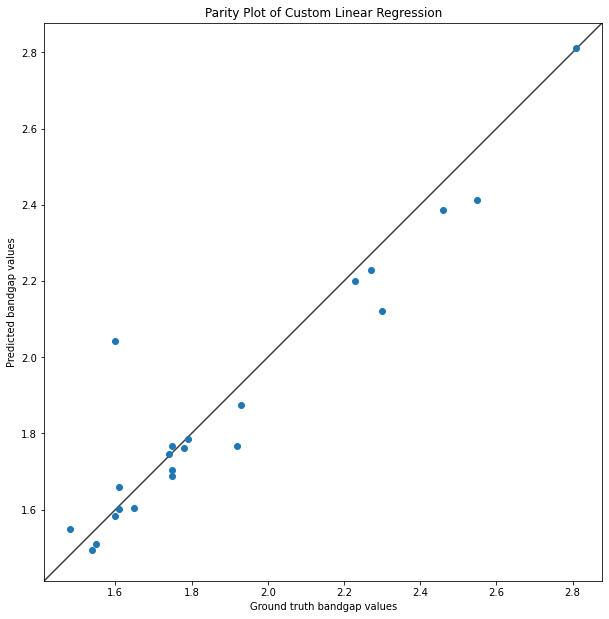

In [4]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Ridge regression adds a sum of squares of the wieght terms multiplied with a constant in the loss function.
Thus the algorithm makes sure to optimize such a way that even the weights are minimized(and sometimes made zero) and reduce overfitting.


alpha controls the effect of the of the sum of the squares of the weights added to the loss function . Alpha is multipled with the sum of the sqaures of the weights and added to loss function. 
SoThis means that when alpha = 0 then the effect of the term would be 0 and the loss function woudld be same as the normal linear regression.
(can be inferred from table in the following cell)
when the alpha value is very low or 0 its rmse is similar to linear regression in the above section as alpha increases the effect of the sum of the squares of the weights increases in loss function and hence by the algorithm eventually tries to decrease the magnitude of the weights as less as possible . 
So, in most cases, as alpha increases the sum of the squares of the weights also decreases and we can infer the same from the below table .

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

     alpha       MSE
0   0.0001  0.013638
1   0.0010  0.013637
2   0.0100  0.013627
3   0.1000  0.013580
4   1.0000  0.016070
5   2.0000  0.021195
6  10.0000  0.052901


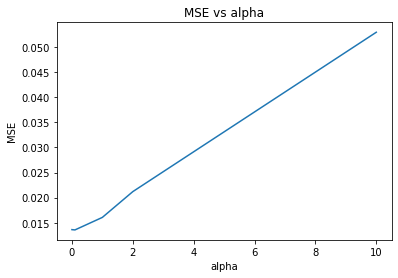

In [5]:
# you should not have imported sklearn before this point
import sklearn

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Ridge Regression using sklearn

class RidgeRegression():
    def __init__(self, X_train, y_train, alpha):
        self.X = X_train
        self.y = y_train
        self.alpha = alpha

    def fit(self):
        self.model = Ridge(alpha=self.alpha)
        self.model.fit(self.X, self.y)
        return self.model

    def predict(self, X_test):
        return self.model.predict(X_test)

    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        MSE_pred = mean_squared_error(y_test, y_pred)
        return MSE_pred, y_pred

    def plot(self):
        plt.scatter(self.X[:,1], self.y, color = 'red')
        plt.plot(self.X[:,1], self.model.predict(self.X), color = 'blue')
        plt.title('Ridge Regression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 2, 10]
# alpha = [0.1]
MSE_pred = []
for i in range(len(alpha)):
    model = RidgeRegression(np.array(x_train), np.array(y_train), alpha[i])
    model.fit()
    MSE, y_pred = model.accuracy(np.array(x_test), np.array(y_test))
    MSE_pred.append(MSE)

# print("MSE of Predictions = " , MSE_pred)
import pandas as pd
df = pd.DataFrame({'alpha': alpha, 'MSE': MSE_pred})
print(df)

# Plot the MSE vs alpha

plt.plot(alpha, MSE_pred)
plt.title('MSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()




### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression is similar to ridge regression and it tries to optimize the function  in such a way that the magnitude of wight values are smaller . In lasso regression sum of absolute(or mod) of weight terms is added to the loss term multiplied with a constant k.

the parameter alpha controls the effect of the of the sum of the absolute values  of the weights added to the loss function . 
Alpha is multipled with the sum of the absolute values of the weights and added to loss function. 
This means that when alpha is =0 then the effect of the term would be 0 and the loss function woudld be same as the normal linear regression and in this case lasso regression performs similar to linear regression. 
The same is observed from the below table as well (aplha vs mse). when the alpha value is very low or 0 its rmse is similar to linear regression in the above section .as alpha increases the loss function gives higher importance to the added term and eventually tries to decrease the value of the term as low as possible since the weight values are not scared it might be eventually become 0 at a faster rate as alpha increases.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

    alpha       MSE
0  0.0001  0.013626
1  0.0010  0.013567
2  0.0100  0.016898
3  0.1000  0.120175
4  1.0000  0.138336
5  2.0000  0.138336


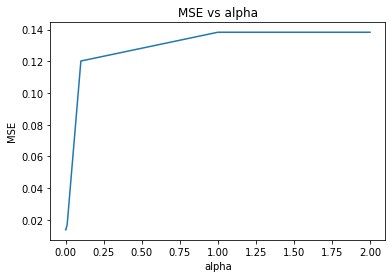

In [6]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Lasso Regression using sklearn

class LassoRegression():
    def __init__(self, X_train, y_train, alpha):
        self.X = X_train
        self.y = y_train
        self.alpha = alpha

    def fit(self):
        self.model = Lasso(alpha=self.alpha)
        self.model.fit(self.X, self.y)
        return self.model

    def predict(self, X_test):
        return self.model.predict(X_test)

    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        MSE_pred = mean_squared_error(y_test, y_pred)
        return MSE_pred, y_pred

    def plot(self):
        plt.scatter(self.X[:,1], self.y, color = 'red')
        plt.plot(self.X[:,1], self.model.predict(self.X), color = 'blue')
        plt.title('Lasso Regression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()
    
# alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 2]
MSE_pred = []
for i in range(len(alpha)):
    model = LassoRegression(np.array(x_train), np.array(y_train), alpha[i])
    model.fit()
    MSE, y_pred = model.accuracy(np.array(x_test), np.array(y_test))
    MSE_pred.append(MSE)

# print("MSE of Predictions = " , MSE_pred)

# pandas dataframe table for MSE vs alpha

import pandas as pd
df = pd.DataFrame({'alpha': alpha, 'MSE': MSE_pred})
print(df)

# Plot the MSE vs alpha

plt.plot(alpha, MSE_pred)
plt.title('MSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

